# Decision Tree Exercises

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
%matplotlib inline

import acquire
import prepare

## Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

### What is your baseline prediction?  What is your baseline accuracy?  

Remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [2]:
titanic = acquire.get_titanic_data()

titanic.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
titanic = prepare.prep_titanic(titanic)

In [5]:
titanic.drop(columns=['sex', 'embark_town'], inplace=True)

In [7]:
train, val, test = prepare.split_train_test(titanic, 'survived')

train.shape, val.shape, test.shape

((534, 9), (214, 9), (143, 9))

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 776 to 768
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 534 non-null    int64  
 1   pclass                   534 non-null    int64  
 2   sibsp                    534 non-null    int64  
 3   parch                    534 non-null    int64  
 4   fare                     534 non-null    float64
 5   alone                    534 non-null    int64  
 6   sex_male                 534 non-null    uint8  
 7   embark_town_Queenstown   534 non-null    uint8  
 8   embark_town_Southampton  534 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 30.8 KB


In [9]:
x_train = train.drop(columns='survived')
y_train = train['survived']

x_val = val.drop(columns='survived')
y_val = val['survived']

x_test = test.drop(columns='survived')
y_test = test['survived']

survived = positive  
died = negative

In [ ]:
#to get baseline we will do a value count of our target variable

In [10]:
titanic['baseline'] = titanic.survived.value_counts().idxmax()

In [11]:
(titanic.survived == titanic.baseline).mean()

0.6161616161616161

The baseline prediction is that everyone died, and the accuracy of that is 61.61%

### Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



Since the majority here is that any given person is more likely to have died, our confusion matrix will look like this:

In [12]:
seed = 42

clf = DecisionTreeClassifier(max_depth=3, random_state=42)

In [13]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [14]:
y_pred = clf.predict(x_train)

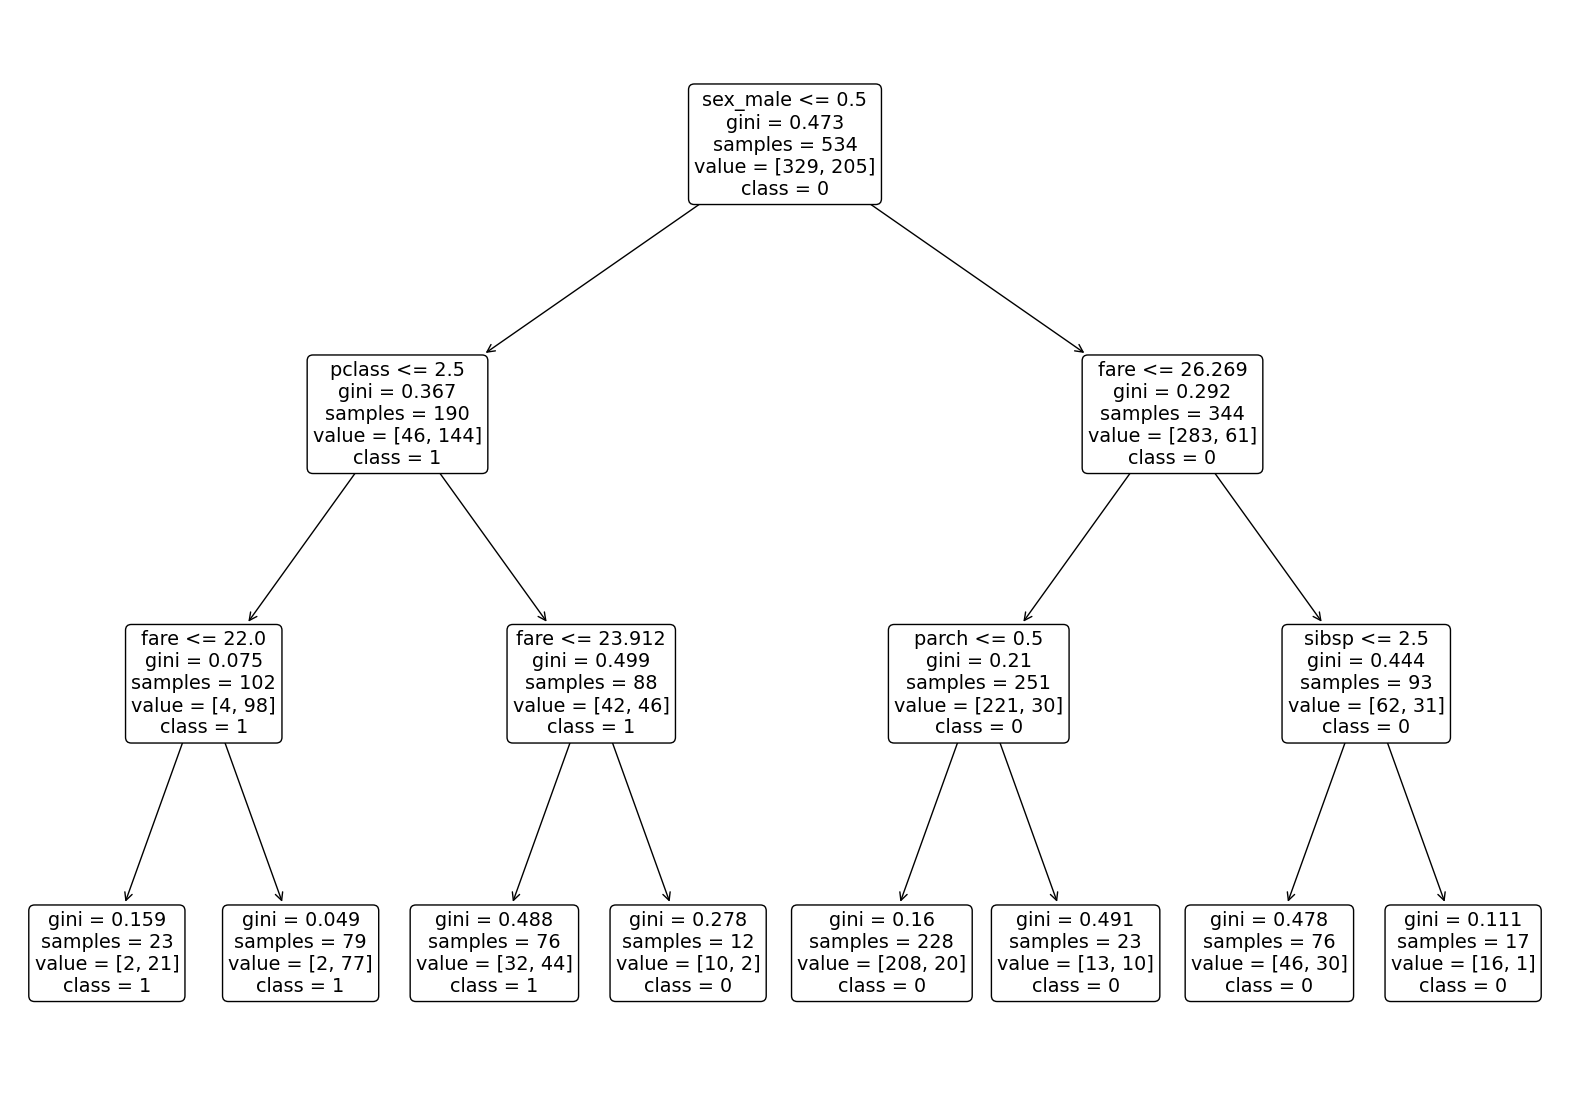

In [15]:
plt.figure(figsize=(20, 14))
plot_tree(clf, feature_names=x_train.columns, class_names=['0', '1'], rounded=True)
plt.show()

### Evaluate your in-sample results using the model score, confusion matrix, and classification report.



In [16]:
clf.score(x_train, y_train)

0.8146067415730337

In [17]:
clf.score(x_val, y_val)

0.7897196261682243

In [18]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,293,36
1,63,142


TP = 235    
TN = 134     
FP = 39  
FN = 37  

In [19]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       329
           1       0.80      0.69      0.74       205

    accuracy                           0.81       534
   macro avg       0.81      0.79      0.80       534
weighted avg       0.81      0.81      0.81       534



### Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [20]:
(titanic.survived == titanic.baseline).mean()

0.6161616161616161

In [21]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       329
           1       0.80      0.69      0.74       205

    accuracy                           0.81       534
   macro avg       0.81      0.79      0.80       534
weighted avg       0.81      0.81      0.81       534



In [22]:
clf.score(x_val, y_val)

0.7897196261682243

### Run through steps 2-4 using a different max_depth value.



#### Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



In [23]:
seed = 42

clf2 = DecisionTreeClassifier(max_depth=6, random_state=42)

In [24]:
clf2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [25]:
y_pred = clf.predict(x_train)

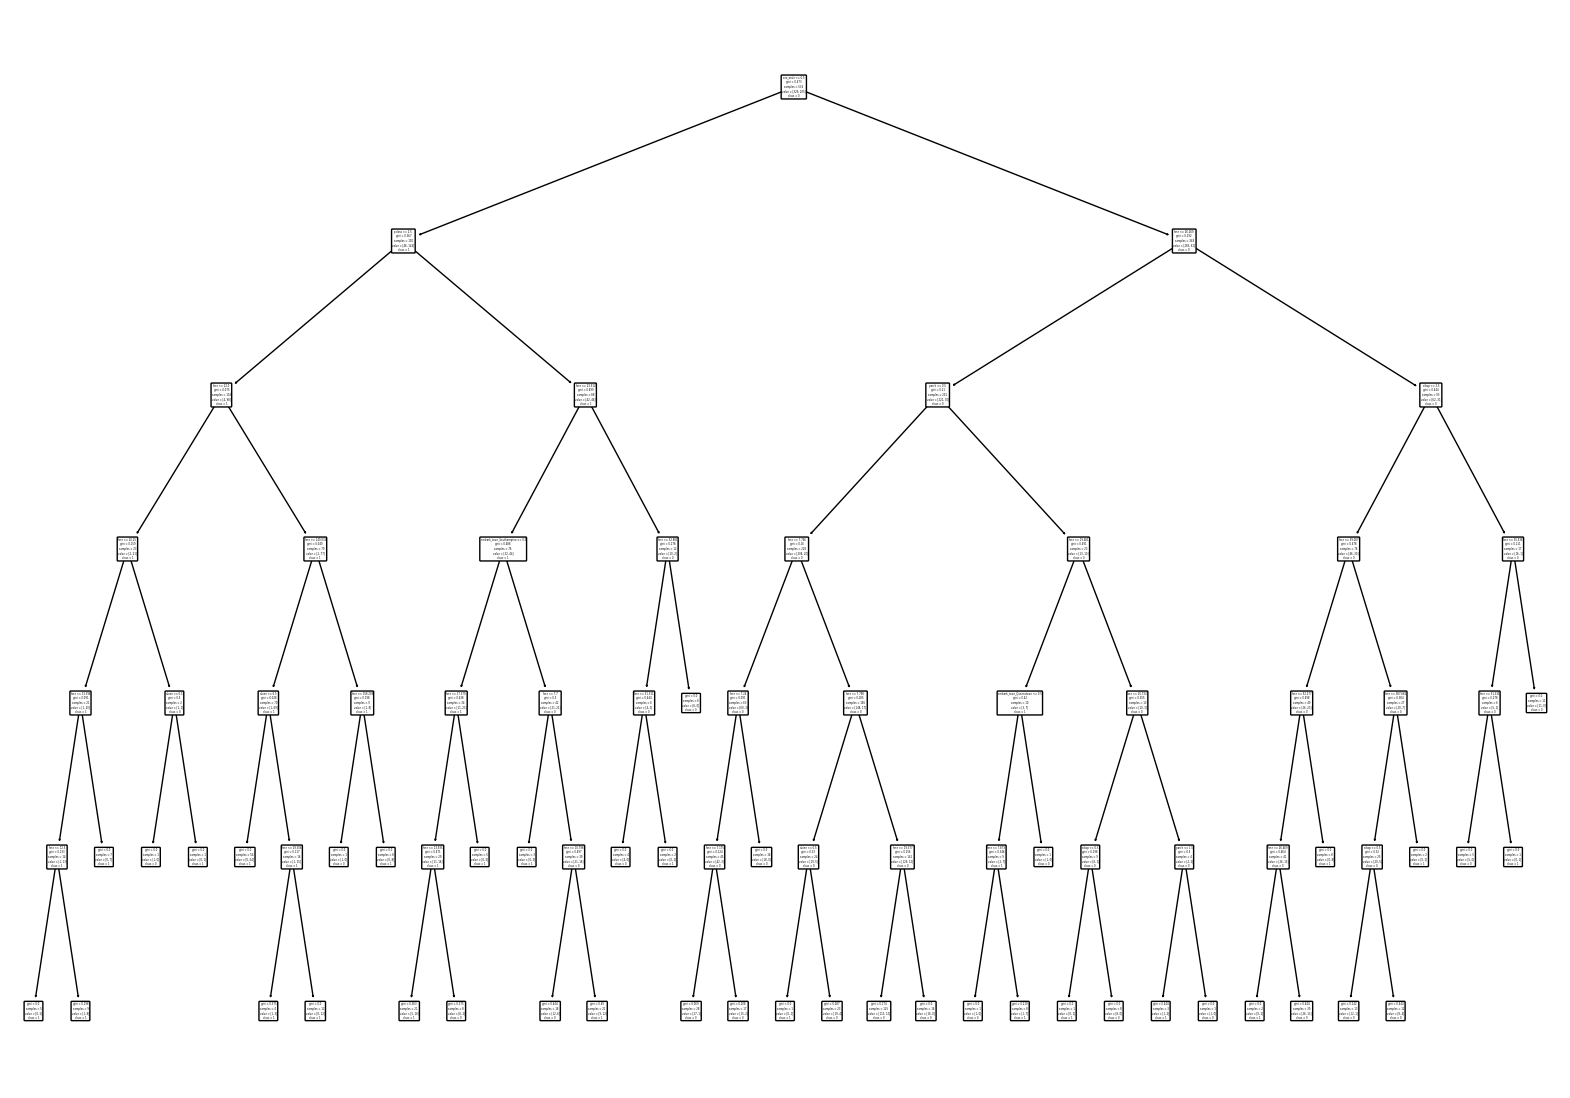

In [26]:
plt.figure(figsize=(20, 14))
plot_tree(clf2, feature_names=x_train.columns, class_names=['0', '1'], rounded=True)
plt.show()

#### Evaluate your in-sample results using the model score, confusion matrix, and classification report.



In [27]:
clf2.score(x_train, y_train)

0.8820224719101124

In [28]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,293,36
1,63,142


In [29]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       329
           1       0.80      0.69      0.74       205

    accuracy                           0.81       534
   macro avg       0.81      0.79      0.80       534
weighted avg       0.81      0.81      0.81       534



In [30]:
clf2.score(x_val, y_val)

0.7850467289719626

#### Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [ ]:
model accuracy?

In [32]:
y_pred = clf2.predict(x_train)

In [33]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       329
           1       0.90      0.78      0.84       205

    accuracy                           0.88       534
   macro avg       0.89      0.86      0.87       534
weighted avg       0.88      0.88      0.88       534



In [34]:
clf2.score(x_train, y_train)

0.8820224719101124

### Which model performs better on your in-sample data?



The second model works better on my in-sample data

### Which model performs best on your out-of-sample data, the validate set?



The second model worked very slightly better, but I'm fairly certain I over-fit the model

## Work through these same exercises using the Telco dataset.


In [83]:
telco = acquire.get_telco_data()

In [84]:
telco = prepare.prep_telco(telco)

In [85]:
telco['total_charges'] = telco['total_charges'].replace(' ', '0')

In [86]:
telco['total_charges'] = telco['total_charges'].astype(float)

### What is your baseline prediction? What is your baseline accuracy?  

Remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [92]:
telco['baseline'] = telco.churn.value_counts().idxmax()

In [93]:
(telco.churn == telco.baseline).mean()

0.7346301292063041

My baseline prediction is that a given customer has not churned, and the accuracy is 73%

### Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)


In [87]:
train, val, test = prepare.split_train_test(telco, 'churn')

In [88]:
train.shape, val.shape, test.shape

((4225, 31), (1690, 31), (1128, 31))

In [89]:
x_train = train.drop(columns='churn')
y_train = train['churn']

x_val = val.drop(columns='churn')
y_val = val['churn']

x_test = test.drop(columns='churn')
y_test = test['churn']

In [90]:
seed = 42

clf = DecisionTreeClassifier(max_depth=8, random_state=42)

In [91]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

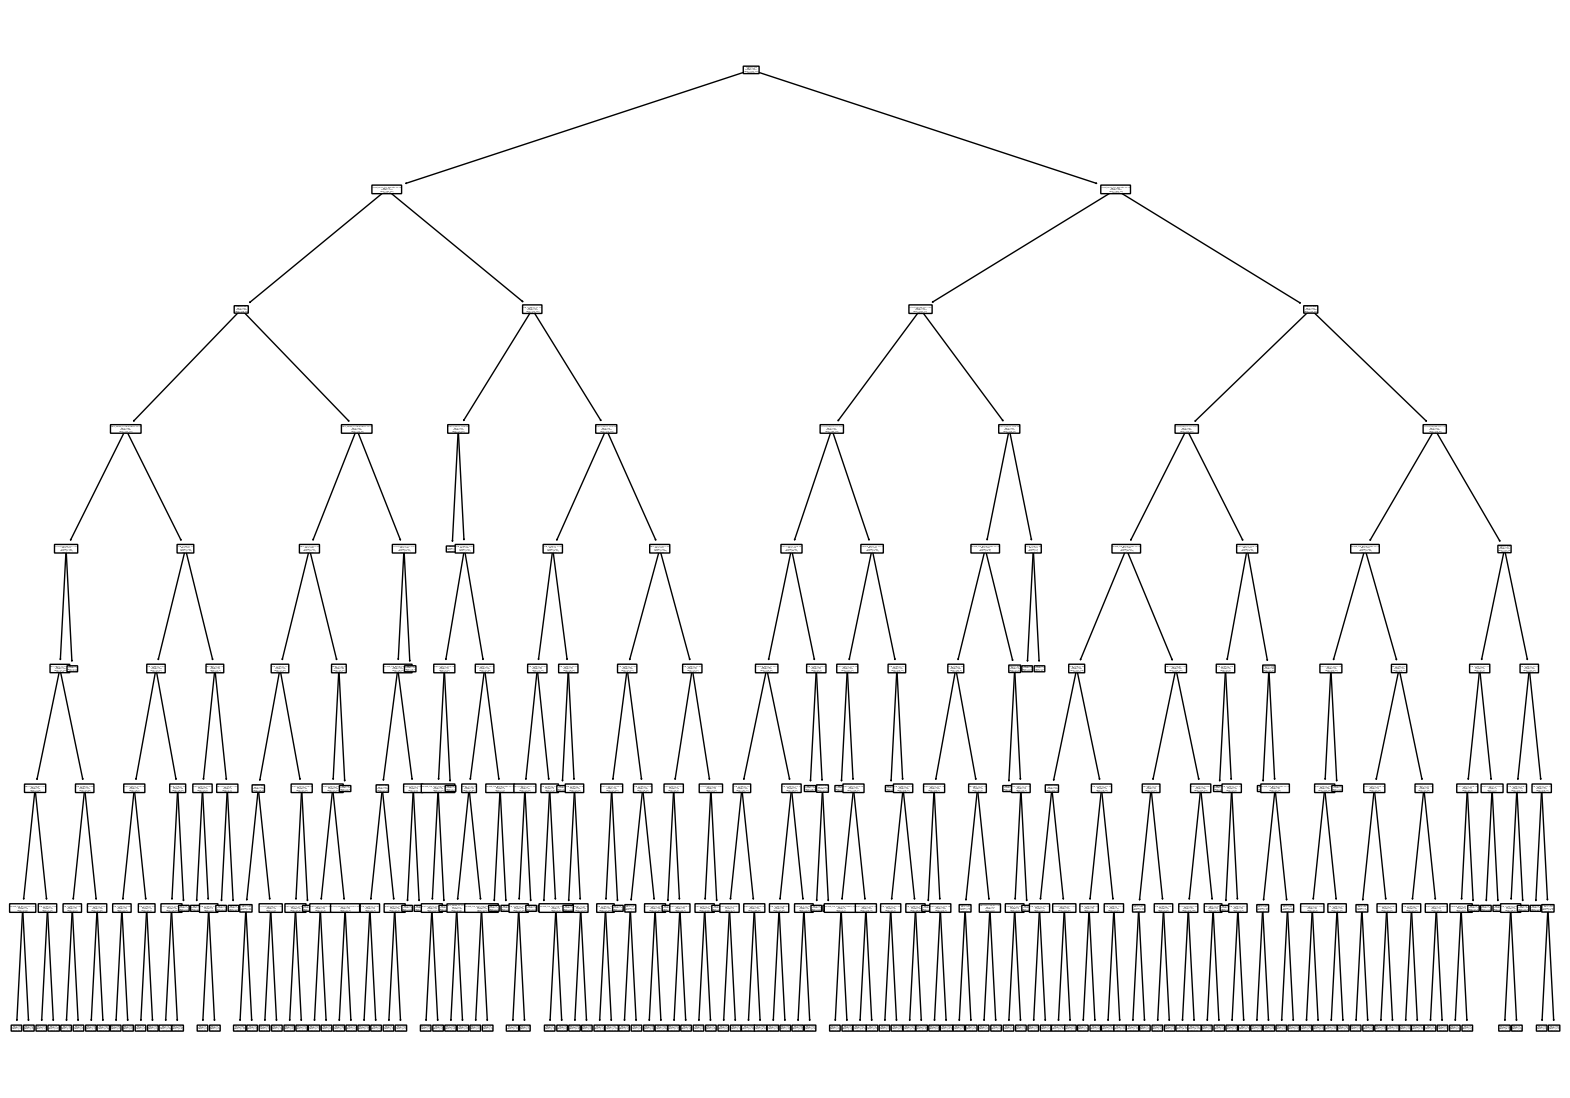

In [94]:
plt.figure(figsize=(20, 14))
plot_tree(clf, feature_names=x_train.columns, class_names=clf.classes_, rounded=True)
plt.show()

### Evaluate your in-sample results using the model score, confusion matrix, and classification report.


In [95]:
clf.score(x_train, y_train)

0.8402366863905325

In [96]:
clf.score(x_val, y_val)

0.7917159763313609

In [97]:
y_pred = clf.predict(x_train)

In [99]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.93      0.89      3104
         Yes       0.75      0.60      0.67      1121

    accuracy                           0.84      4225
   macro avg       0.81      0.77      0.78      4225
weighted avg       0.83      0.84      0.83      4225



In [100]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,2872,232
1,443,678


In [102]:
tp = 2872  
fn = 443  
fp = 232  
tn = 678

### Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [119]:
clf.score(x_val, y_val)

0.7917159763313609

In [101]:
clf.score(x_train, y_train)

0.8402366863905325

In [104]:
precision = tp / (tp+fp)
recall = tp / (tp+fn)
specificity = tn / (fp+tn)

precision, recall, specificity

(0.9252577319587629, 0.8663650075414782, 0.7450549450549451)

In [105]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.93      0.89      3104
         Yes       0.75      0.60      0.67      1121

    accuracy                           0.84      4225
   macro avg       0.81      0.77      0.78      4225
weighted avg       0.83      0.84      0.83      4225



### Run through steps 2-4 using a different max_depth value.


#### Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)


In [106]:
seed = 42

clf2 = DecisionTreeClassifier(max_depth=5, random_state=42)

In [107]:
clf2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

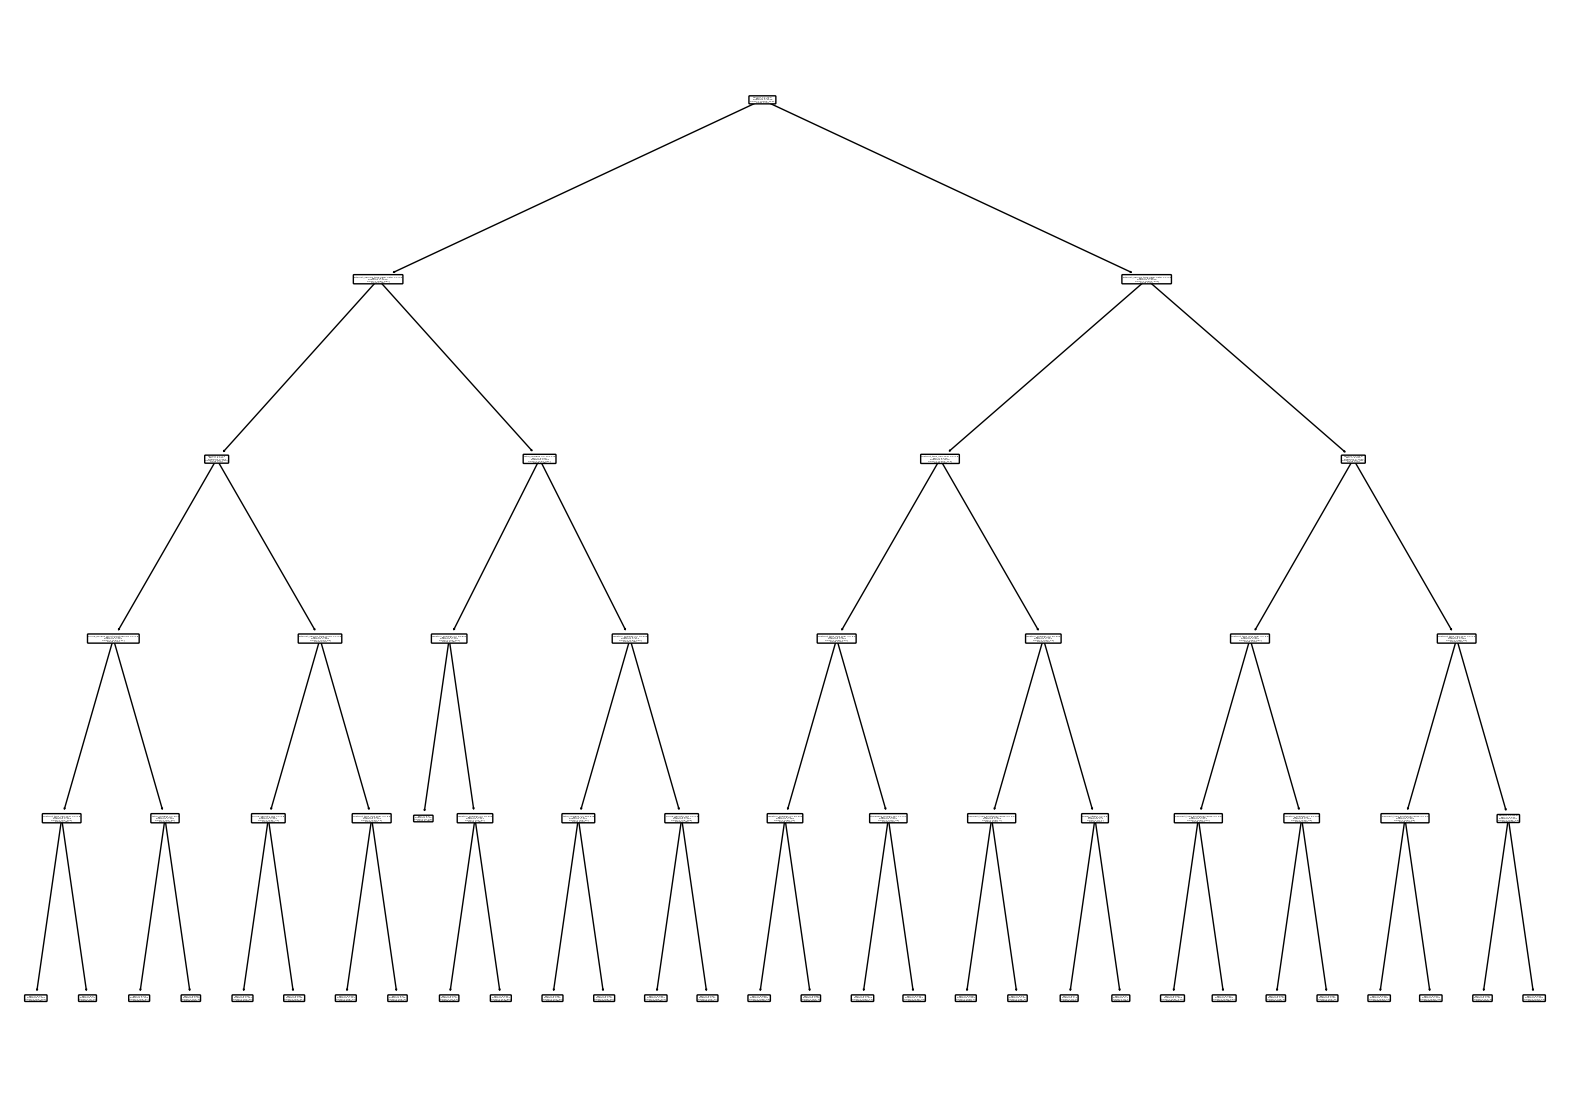

In [108]:
plt.figure(figsize=(20, 14))
plot_tree(clf2, feature_names=x_train.columns, class_names=clf2.classes_, rounded=True)
plt.show()

#### Evaluate your in-sample results using the model score, confusion matrix, and classification report.


In [109]:
clf2.score(x_train, y_train)

0.8023668639053254

In [110]:
y_pred = clf2.predict(x_train)

In [111]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,2768,336
1,499,622


In [114]:
tp = 2768
tn = 622
fn = 499
fp = 336

In [113]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      3104
         Yes       0.65      0.55      0.60      1121

    accuracy                           0.80      4225
   macro avg       0.75      0.72      0.73      4225
weighted avg       0.79      0.80      0.80      4225



#### Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [115]:
precision = tp / (tp+fp)
recall = tp / (tp+fn)
specificity = tn / (fp+tn)

precision, recall, specificity

(0.8917525773195877, 0.84726048362412, 0.6492693110647182)

In [116]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      3104
         Yes       0.65      0.55      0.60      1121

    accuracy                           0.80      4225
   macro avg       0.75      0.72      0.73      4225
weighted avg       0.79      0.80      0.80      4225



In [118]:
clf2.score(x_train, y_train)

0.8023668639053254

In [117]:
clf2.score(x_val, y_val)

0.7934911242603551

### Which model performs better on your in-sample data?


Model 1 performs better on my in sample data

### Which model performs best on your out-of-sample data, the validate set?


Model 2 performs *slightly* better on my in sample data, which is good since I think I over-fit my model in model 1

# Class examples

## Titanic Dataset 

In [4]:
titanic = acquire.get_titanic_data()

titanic.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [5]:
titanic = prepare.prep_titanic(titanic)

In [6]:
titanic.drop(columns=['sex', 'embark_town'], inplace=True)

In [7]:
train, val, test = prepare.split_train_test(titanic, 'survived')

train.shape, val.shape, test.shape

((534, 9), (214, 9), (143, 9))

In [8]:
x_train = train.drop(columns='survived')
y_train = train['survived']

x_val = val.drop(columns='survived')
y_val = val['survived']

x_test = test.drop(columns='survived')
y_test = test['survived']

In [9]:
#to get baseline we will do a value count of our target variable

train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [10]:
#make the thing
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

In [11]:
#fit the thing
tree1 = tree1.fit(x_train, y_train)

In [12]:
y_pred = tree1.predict(x_train)

In [13]:
accuracy = tree1.score(x_train, y_train)
accuracy

0.8146067415730337

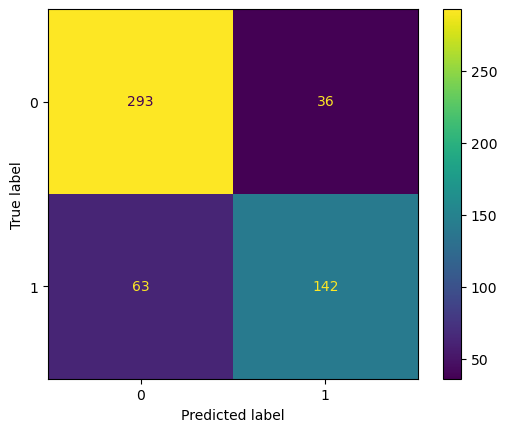

In [17]:
plot_confusion_matrix(tree1, x_train, y_train)

In [18]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       329
           1       0.80      0.69      0.74       205

    accuracy                           0.81       534
   macro avg       0.81      0.79      0.80       534
weighted avg       0.81      0.81      0.81       534



In [23]:
print(f' Our baseline accuracy for non-survival in call cases on the Titanic is {(y_train == 0).mean()}')

 Our baseline accuracy for non-survival in call cases on the Titanic is 0.6161048689138576


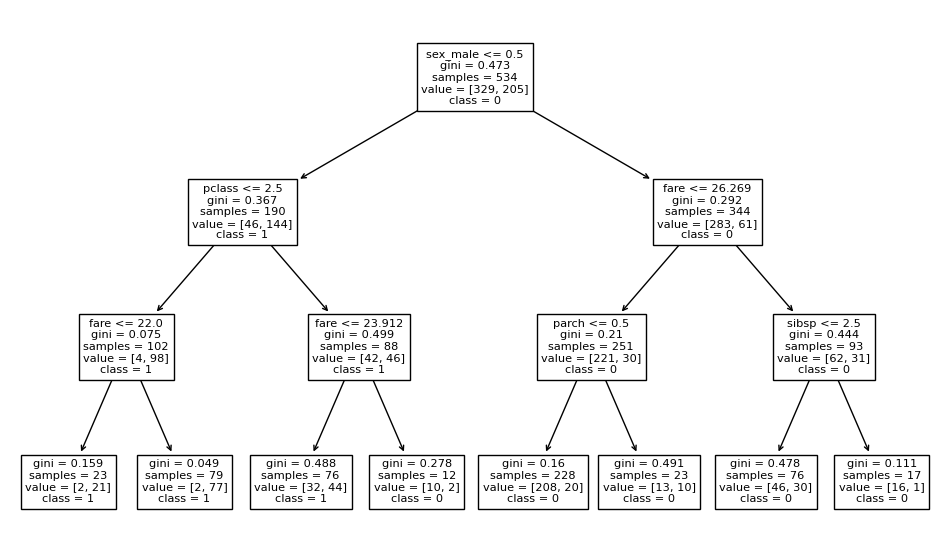

In [31]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=x_train.columns, class_names=['0', '1'])
plt.show()

In [32]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

In [33]:
tn, fp, fn, tp

(293, 36, 63, 142)

In [38]:
negative_cases = tp+fp
positive_cases = fn+tn

In [39]:
print(f'Negative cases: {negative_cases}')
print(f'Positive cases: {positive_cases}')
print(y_train.value_counts())

Negative cases: 178
Positive cases: 356
0    329
1    205
Name: survived, dtype: int64


In [42]:
for i in range(1, 21):
    trees = DecisionTreeClassifier(max_depth=i, random_state=123)
    trees = trees.fit(x_train, y_train)
    y_preds = trees.predict(x_train)
    report = classification_report(y_train, y_preds, output_dict=True)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.822674    0.757895  0.799625    0.790285      0.797806
recall       0.860182    0.702439  0.799625    0.781311      0.799625
f1-score     0.841010    0.729114  0.799625    0.785062      0.798054
support    329.000000  205.000000  0.799625  534.000000    534.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.822674    0.757895  0.799625    0.790285      0.797806
recall       0.860182    0.702439  0.799625    0.781311      0.799625
f1-score     0.841010    0.729114  0.799625    0.785062      0.798054
support    329.000000  205.000000  0.799625  534.000000    534.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.823034    0.797753  0.814607    0.810393      0.813328
recall       0.890578    0.692683  0.814607    0.791630      0.814607
f1-score     

In [47]:
metrics = []

for i in range(1, 25):
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)
    tree = tree.fit(x_train, y_train)
    in_sample_accuracy = tree.score(x_train, y_train)
    out_of_sample_accuracy = tree.score(x_val, y_val)
    
    output = { 'max_depth': i, 'train_accuracy': in_sample_accuracy, 
              'validate_accuracy': out_of_sample_accuracy}
    metrics.append(output)

df = pd.DataFrame(metrics)
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.799625,0.761682,0.037943
1,2,0.799625,0.761682,0.037943
2,3,0.814607,0.789720,0.024887
3,4,0.822097,0.775701,0.046396
4,5,0.857678,0.761682,0.095996
5,6,0.882022,0.785047,0.096976
6,7,0.897004,0.789720,0.107284
7,8,0.917603,0.780374,0.137229
8,9,0.926966,0.775701,0.151265
9,10,0.940075,0.794393,0.145682


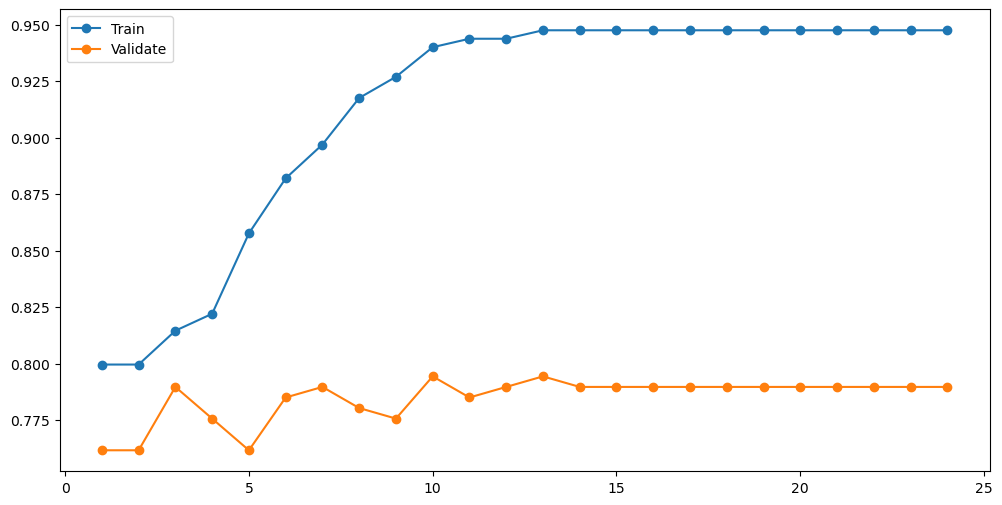

In [51]:
plt.figure(figsize=(12,6))
plt.plot(df.max_depth, df.train_accuracy, marker='o', label='Train')
plt.plot(df.max_depth, df.validate_accuracy, marker='o', label='Validate')
plt.legend()
plt.show()
